<a href="https://colab.research.google.com/github/naznmr/ICD9/blob/main/icd9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd

تمرین 1
بخش 1

دوتا فایل اکسل MIMIC_III چون ستون مشترک دارند را باهم ادغام میکنیم و هردو فایل در ستون ICD9_CODE مشترک اند.
سپس ستون ICD9_CODE را ذخیرا می کنیم و مقادیر آن ستون رو به ازای هر تکرار ذخیره می کنیم.
چون به صورت sort شده قرار می گیرد بنابراین ایندکس 0 ماکزیمم مقدار می باشد.
برای محاسبه درصد هم مقادیر را تقسیم بر مجموع کل کرده و در 100 ضرب می کنیم.
در نهایت با استفاده از دستور .head(10) ده تا از شایع ترین بیماری هارا چاپ می کنیم.

In [ ]:
MIMIC_III_ICD_path = "/content/drive/My Drive/datasetcolab/MIMIC_III_D_ICD_DIAGNOSES.csv" # آدرس فایل
MIMIC_III_DIAGNOSES_path =  "/content/drive/My Drive/datasetcolab/MIMIC_III_DIAGNOSES_ICD.csv" # آدرس فایل

icd_read = pd.read_csv(MIMIC_III_ICD_path) # خواندن فایل در آدرس مشخص شده
diagnoses_read = pd.read_csv(MIMIC_III_DIAGNOSES_path) # خواندن فایل در آدرس مشخص شده

merged_icd9 = pd.merge(icd_read, diagnoses_read, on = "ICD9_CODE", how = "left") # ادغام دو فایل باهم که در ستون ICD9_CODE مشترکند

icd9_column = merged_icd9["ICD9_CODE"] # ذخیره ستون ICD9_CODE در یک متغییر

icd9_count = icd9_column.value_counts() # تعداد تکرار هر کد در ستون ذخیره شده
print("\n count of icd9 codes : ", icd9_count)

max_code = icd9_count.index[0] # نتایج sort شده است و اولین نتیجه ماکزیمم مقدار است
short_title = merged_icd9["SHORT_TITLE"].iloc[0] # مقدار ستون SHORT_TITLE برای مشخص کردن بیماری
print("\n max code : ", max_code)
print("\n short title : ", short_title)

sum_icd9 = icd9_count.sum() # جمع مقادیر ستون مشخص شده
print("\n sum of counts is : ", sum_icd9)

percent = (icd9_count / sum_icd9) * 100 # محاسبه درصد هر مقدار از ستون
print("\n The percent of icd9 codes : ", percent)

top_10 = percent.head(10) # انتخاب ده تا از اولین مقادیر ستون
print("\n top 10 percent of codes : ", top_10)


 count of icd9 codes :  ICD9_CODE
4019     20703
4280     13111
42731    12891
41401    12429
5849      9119
         ...  
53981        1
5430         1
55001        1
55002        1
V743         1
Name: count, Length: 14567, dtype: int64

 max code :  4019

 short title :  TB pneumonia-oth test

 sum of counts is :  642435

 The percent of icd9 codes :  ICD9_CODE
4019     3.222583
4280     2.040829
42731    2.006584
41401    1.934670
5849     1.419443
           ...   
53981    0.000156
5430     0.000156
55001    0.000156
55002    0.000156
V743     0.000156
Name: count, Length: 14567, dtype: float64

 top 10 percent of codes :  ICD9_CODE
4019     3.222583
4280     2.040829
42731    2.006584
41401    1.934670
5849     1.419443
25000    1.409948
2724     1.352666
51881    1.166966
5990     1.020337
53081    0.984691
Name: count, dtype: float64


تمرین 1 بخش 2

بر اساس یک ستون گروه بندی کرده و مقادیر را شمرده و میانگین می گیریم

In [ ]:
visited = merged_icd9.groupby("HADM_ID")["ICD9_CODE"].count() # گروه بندی بر اساس ستون HADM_ID و شمارش تعداد تکرار مقادیر ستون ICD9_ID
mean_visited = visited.mean() # میانگین داده ها
print("The mean of visited : ", mean_visited)

The mean of visited :  10.771472210436997


تمرین 1 بخش 3

توضیحات این تمرین مانند تمرین اول است و کد هم مثل تمرین بخش اول است.

In [ ]:
MIMIC_IV_ICD_path = "/content/drive/My Drive/datasetcolab/MIMIC_IV_d_icd_diagnoses.csv"
MIMIC_IV_DIAGNOSES_path =  "/content/drive/My Drive/datasetcolab/MIMIC_IV_diagnoses_icd.csv"

icd_read = pd.read_csv(MIMIC_IV_ICD_path)
diagnoses_read = pd.read_csv(MIMIC_IV_DIAGNOSES_path)

merged_icd = pd.merge(icd_read, diagnoses_read, on = "icd_code", how = "left")


icd_column = merged_icd["icd_code"]
icd_count = icd_column.value_counts()
print("count of icd10 codes : ", icd_count)

max_code = icd_count.index[0]
long_title = merged_icd["long_title"].iloc[0]
print("\n max code : ", max_code)
print("\n short title : ", long_title)

sum_icd = icd_count.sum()
print("\n sum of counts is : ", sum_icd)

percent = (icd_count / sum_icd) * 100
print("\n The percent of icd10 codes : ", percent)

top_10 = percent.head(10)
print("\n top 10 percent of codes : ", top_10)

count of icd10 codes :  icd_code
4019       97361
2724       63875
I10        51706
E785       48581
53081      46238
           ...  
S12250K        1
S12250G        1
S12250D        1
S12250B        1
S42416K        1
Name: count, Length: 109282, dtype: int64

 max code :  4019

 short title :  Cholera due to vibrio cholerae

 sum of counts is :  4943974

 The percent of icd10 codes :  icd_code
4019       1.969286
2724       1.291977
I10        1.045839
E785       0.982631
53081      0.935240
             ...   
S12250K    0.000020
S12250G    0.000020
S12250D    0.000020
S12250B    0.000020
S42416K    0.000020
Name: count, Length: 109282, dtype: float64

 top 10 percent of codes :  icd_code
4019      1.969286
2724      1.291977
I10       1.045839
E785      0.982631
53081     0.935240
25000     0.829879
Z87891    0.786675
42731     0.711573
311       0.700489
4280      0.699781
Name: count, dtype: float64


تمرین 1 بخش 4

این تمرین هم شبیه تمرین بخش دو است

In [ ]:
visited = merged_icd.groupby("hadm_id")["icd_code"].count()
mean_visited = visited.mean()
print("The mean of visited : ", mean_visited)

The mean of visited :  11.280625365554762


تمرین 1 بخش 5

In [ ]:
print("The reason 1 : ")
print("\n تفاوت در بیماران : مثلا در لیست اول بیمارانی که مشکلات جدی تر دارند و اکثرا نیازمند به بستری در بیمارستان می باشند وجود دارد اما در لیست دوم همه بیماران چه عادی و چه خاص وجود دارند یعنی بیمارانی که نیاز به بستری دارند و یا بیمارانی که فقط برای چکاپ مراجعه می کنند.")
print("\n The reason 2 : ")
print("\n تغییرات در کدهای ICD : لیست جدید به روزرسانی شده است و اطلاعات آن دقیق تر می باشد زیرا جامع است و اکثر بیماران را شامل می شود اما لیست اول و قدیمی تر شامل تعداد محدودی از بیماران خاص می باشد و نسبت به لیست جدید از دقت پایینی برخوردار است.")

The reason 1 : 

 تفاوت در بیماران : مثلا در لیست اول بیمارانی که مشکلات جدی تر دارند و اکثرا نیازمند به بستری در بیمارستان می باشند وجود دارد اما در لیست دوم همه بیماران چه عادی و چه خاص وجود دارند یعنی بیمارانی که نیاز به بستری دارند و یا بیمارانی که فقط برای چکاپ مراجعه می کنند.

 The reason 2 : 

 تغییرات در کدهای ICD : لیست جدید به روزرسانی شده است و اطلاعات آن دقیق تر می باشد زیرا جامع است و اکثر بیماران را شامل می شود اما لیست اول و قدیمی تر شامل تعداد محدودی از بیماران خاص می باشد و نسبت به لیست جدید از دقت پایینی برخوردار است.


تمرین 1 بخش 6

In [ ]:
print("code : ICD10")
print("\n زیرا دقیق تر به روزتر و جامع تر می باشد.")

code : ICD10

 زیرا دقیق تر به روزتر و جامع تر می باشد.


تمرین 2

In [ ]:
from google.colab import auth
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
auth.authenticate_user()

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!gsutil cp gs://mlhc2023/MIMIC_III_DIAGNOSES_ICD.csv ./
!gsutil cp gs://mlhc2023/MIMIC_III_D_ICD_DIAGNOSES.csv ./
!gsutil cp gs://mlhc2023/MIMIC_IV_d_icd_diagnoses.csv ./
!gsutil cp gs://mlhc2023/MIMIC_IV_diagnoses_icd.csv ./

You are attempting to access protected data with no configured
credentials. Please visit https://cloud.google.com/console#/project
and sign up for an account, and then run the "gcloud auth login"
command to configure gsutil to use these credentials.
You are attempting to access protected data with no configured
credentials. Please visit https://cloud.google.com/console#/project
and sign up for an account, and then run the "gcloud auth login"
command to configure gsutil to use these credentials.
You are attempting to access protected data with no configured
credentials. Please visit https://cloud.google.com/console#/project
and sign up for an account, and then run the "gcloud auth login"
command to configure gsutil to use these credentials.
You are attempting to access protected data with no configured
credentials. Please visit https://cloud.google.com/console#/project
and sign up for an account, and then run the "gcloud auth login"
command to configure gsutil to use these credentials.


In [ ]:
# Load the ICD codes to names CSVs.
icd9_code_to_names = pd.read_csv(MIMIC_III_ICD_path)
mimiv_iv_icd_to_name = pd.read_csv(MIMIC_IV_ICD_path)

# Create a mapping of codes to names
icd9_to_name = dict(zip(icd9_code_to_names.ICD9_CODE, icd9_code_to_names.LONG_TITLE))

# Do the same for MIMIC_IV, but only consider ICD 10 codes.
icd10_only = mimiv_iv_icd_to_name[mimiv_iv_icd_to_name['icd_version'] == 10]
icd10_to_name = dict(zip(icd10_only.icd_code, icd10_only.long_title))

تمرین 2 بخش 1

با استفاده از دستور mean میانگین و با استفاده از دستور median میانه را پیدا می کنیم.

In [ ]:
stay_path = "/content/drive/My Drive/datasetcolab/length_of_stay(light).csv" # آدرس فایل
stay_read = pd.read_csv(stay_path) # خواندن فایل در آدرس ذخیره شده

mean_stay = stay_read["length_of_stay"].mean() # محاسبه میانگین داده های موجود در ستون length_of_stay
print("\n The mean of stay length : ", mean_stay)

median_stay = stay_read["length_of_stay"].median() # محاسبه میانه داده های موجود در ستون length_of_stay
print("\n The median of stay length : ", median_stay)


 The mean of stay length :  12.719832720997774

 The median of stay length :  8.575


تمرین 2 بخش 2

این کد نمودار طول مدت بستری بیماران در بیمارستان را نشان می دهد و بیشترین تعداد بستری بیماران را در یک بازه مشخص نمایش می دهد.

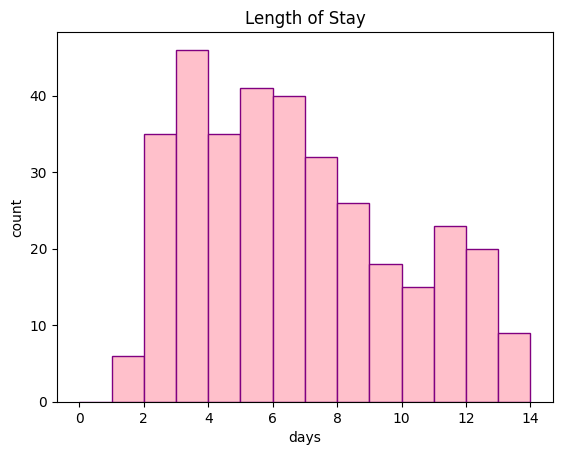


 maximum range :  (3, 4)

 maximum count :  46


In [ ]:
range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] # بازه زمانی

y, x = np.histogram(stay_read["length_of_stay"], bins = range) # محاسبه تعداد داده های موجود در ستون length_of_stay ------> y : فراوانی (تعداد)     x : بازه

plt.hist(stay_read["length_of_stay"], bins = range, edgecolor = "purple", color = "pink") # رسم هیستوگرام داده های length_of_stay و بازه range و تعیین رنگ
plt.title("Length of Stay") # عنوان هیستوگرام
plt.xlabel("days") # برچسب محور x
plt.ylabel("count") # برچسب محور y
plt.show() # نمایش نمودار

max_range = np.argmax(y) # ایندکس بازه دارای بیشترین تعداد
max_count = (x[max_range], x[max_range + 1]) # بازه زمانی که بیشترین تعداد را دارد

print("\n maximum range : ", max_count)
print("\n maximum count : ", y[max_range])

تمرین 2 بخش 3

In [ ]:
print("\n The reason 1 : ")
print("\n در محاسبه میانگین با استفاده از کتابخانه آماده همه مقادیر در نظر گرفته می شود که شامل مقادیر پرت نیز می شود اما در رسم نمودار هیستوگرام مقادیر پرت در نظر گرفته نمی شود.")


 The reason 1 : 

 در محاسبه میانگین با استفاده از کتابخانه آماده همه مقادیر در نظر گرفته می شود که شامل مقادیر پرت نیز می شود اما در رسم نمودار هیستوگرام مقادیر پرت در نظر گرفته نمی شود.


بخش یادگیری ماشین
تمرین 2 بخش 1

با استفاده از رگرسیوت لجستیک پیشبینی می کند که آیا مدت زمان بستری بیش از 7 روز است یا نه.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 AUC :  0.5946915351506455

 Accuracy :  0.6133333333333333


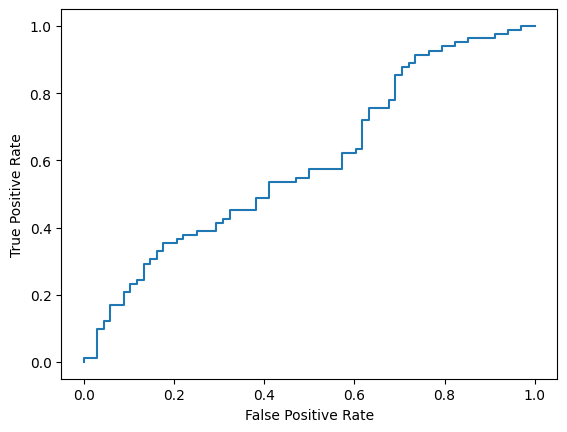

In [ ]:
stay_read["Target"] = (stay_read["length_of_stay"] > 7).astype(int) # ایجاد ستون جدید به نام Target بررسی میکنه هر مقدار از ستون length_of_stay بیشتر از 7 است یا نه اگر بیشتر بود مقدار 1 رو در ستون جدید قرار میشه اگه کمتر بود مقدار 0 قرار میده

X = stay_read.drop(columns=["length_of_stay", "Target"]) # حذف تمام ستون ها به جز length_of_stay و Target
y = stay_read["Target"] # output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7) # تقسیم داده ها به دو بخش آموزش  و تست که 70% آموزشه و 30% تسته

model = LogisticRegression(penalty='l2') # ساخت مدل و استفاده از l2
model.fit(X_train, y_train) # آموزش مدل با 70% از داده ها

y_out = model.predict(X_test) # پیشبینی 0 یا 1
y_plus = model.predict_proba(X_test)[:, 1] # احتمال 1 بودن کلاس

accuracy = accuracy_score(y_test, y_out) # محاسبه دقت مدل و درست بودن داده ها
auc = roc_auc_score(y_test, y_plus) # سطح زیر منحنی ROC نشان دهنده کیفیت

print("\n AUC : ", auc)
print("\n Accuracy : ", accuracy)

from sklearn.metrics import roc_curve
FP, TP, _ = roc_curve(y_test, y_plus)

plt.plot(FP, TP)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

تمرین 2 بخش 2

محاسبه بیشترین دقت مدل

In [ ]:
max_accuracy = max(y_test.mean(), 1 - y_test.mean()) # میانگین مقادیر کلاس 1 و 0 رو حساب میکنه و ماکزیمم مقدار رو به دست میاره
print("\n max accuracy : ", max_accuracy)


 max accuracy :  0.5466666666666666
